In [146]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
path = '/Users/tae/Desktop/Project/image/3Grape_Esca_(Black_Measles)/*'


from skimage import io, color, filters, morphology, segmentation , transform

In [117]:
# image = io.imread(glob.glob(path)[0])
# gray_image = color.rgb2gray(image)
# sobel = filters.sobel(gray_image)
# sobel= np.uint8(sobel * 255)



# markers = morphology.label(sobel < (0.2 * sobel.max()), connectivity=1)
# labels = segmentation.watershed(sobel, markers)
# labels_n = morphology.remove_small_objects(labels, min_size=50)
# maping = color.label2rgb(markers, image=gray_image, bg_label=1)

# plt.imshow(labels)

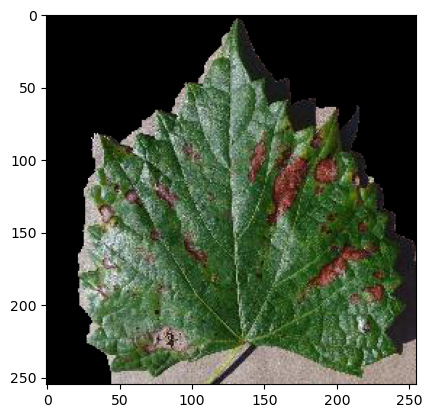

In [147]:
# Cut background
img_rgb = io.imread(glob.glob(path)[0])

mask = np.zeros(img_rgb.shape[:2],np.uint8)
bgModel = np.zeros((1,65) , np.float64)
fgModel = np.zeros((1,65) , np.float64)
rect = (3,3,img_rgb.shape[0],img_rgb.shape[1])

cv2.grabCut(img_rgb , mask , rect , bgModel, fgModel, 2 , cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0 ), 0, 1).astype('uint8')

#result
img_cut = img_rgb * mask2[:,:,np.newaxis]

plt.imshow(img_cut )

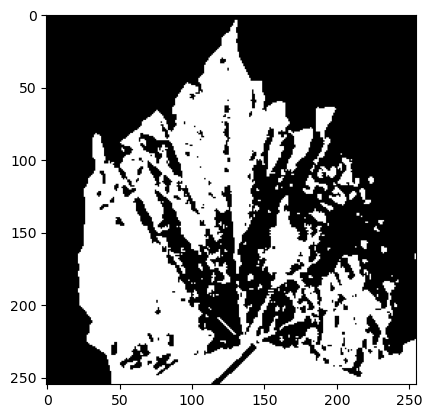

In [148]:
# Convert Gray
gray = cv2.cvtColor(img_cut, cv2.COLOR_BGR2GRAY)


#Threshold Processing

ret, bin_img = cv2.threshold(gray,
                             0, 255, 
                             cv2.THRESH_OTSU)


#remove noise 

bin_img = filters.median(bin_img , footprint=np.ones((3,3)))
plt.imshow(bin_img , cmap='gray')

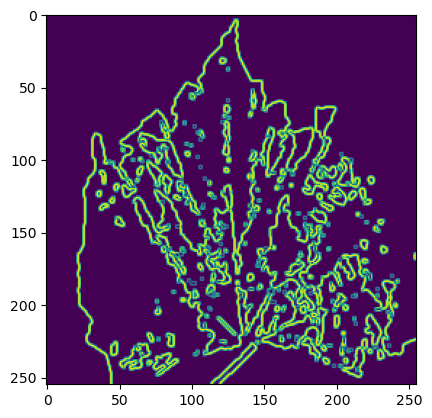

In [149]:
#filter sobel
sobel = filters.sobel(bin_img)
plt.imshow(sobel)

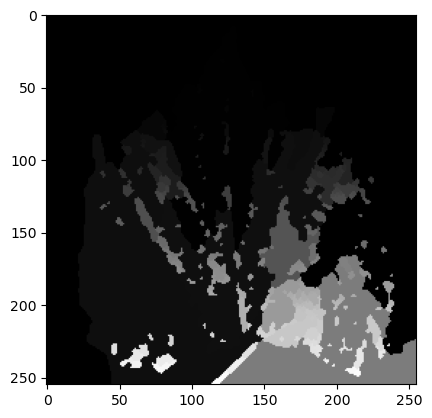

In [153]:
markers = morphology.label(sobel < (0.2 * sobel.max()), connectivity=1)
labels = segmentation.watershed(sobel, markers)
labels_n = morphology.remove_small_objects(labels, min_size=50)
maping = color.label2rgb(markers, image=gray, bg_label=1)

plt.imshow(labels , cmap='gray')